In [10]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [11]:
dfs = []
for i in range(1, 100):
    file = f'listings_{i}.csv'
    try:
        df = pd.read_csv(file, index_col = 0)
        dfs.append(df)
    except:
        break

df  = pd.concat(dfs, axis = 0)

In [12]:
df.shape

(7424, 11)

In [13]:
# df.drop('category', axis = 1, inplace = True)

In [14]:
df.drop_duplicates(keep = 'last', inplace = True)
df.shape

(5625, 11)

In [15]:
df['registration'] = [x[:-1] for x in df['registration'].values]

df['displacement'] = [x[:-3] for x in df['displacement'].values]
df['displacement'] = (df['displacement'].values.astype('float32') * 1e3).astype('int32')

df['km'] = [x[:-3] for x in df['km'].values]
df['km'] = (df['km'].values.astype('float32') * 1e3).astype('int32')

df['hp'] = [x[:-4] for x in df['hp'].values]
df['hp'] = df['hp'].values.astype('float32').astype('int32')

df['fuel'] = [x[:-1] for x in df['fuel'].values]
df['transmission'] = [x[:-1] for x in df['transmission'].values]
df['category'] = [x[:-1] for x in df['category'].values]
df.reset_index(drop = True, inplace = True)

In [16]:
df.tail()

,title,price,registration,km,displacement,hp,fuel,transmission,category,location,link
5620,Hyundai i 20 '18 1.1 DIESEL,11800,08/2017,101000,1100,75,Diesel,Manual,Compact/Hatchback,NaN,https://www.car.gr/classifieds/cars/view/33105...
5621,Renault Clio '17 ΑΥΤΟΜΑΤΟ EURO_6 ΟΘΟΝΗ 90HP ...,12890,03/2018,149800,1461,90,Diesel,Automatic,Other,NaN,https://www.car.gr/classifieds/cars/view/32747...
5622,Toyota Yaris '18 1.4 DIESEL,12900,08/2009,117000,1400,90,Diesel,Manual,Other,NaN,https://www.car.gr/classifieds/cars/view/33024...
5623,Mercedes-Benz C 180 '09 Compressor BlueEFFI...,12300,02/2018,140000,1600,156,Petrol,Manual,4x4/Jeep/Suv,NaN,https://www.car.gr/classifieds/cars/view/33101...
5624,Audi Q2 '18 1.6 TDI,20500,02/2018,113000,1600,115,Diesel,Manual,4x4/Jeep/Suv,NaN,https://www.car.gr/classifieds/cars/view/33167...


In [17]:
# fixing some categories to agree with each other
semi_auto_index = df[df['transmission'] == 'Semi-automatic'].index
df.loc[semi_auto_index, ['transmission']] = 'Automatic'

comm_pass_index = df[df['category'] == 'CommercialPassenger'].index
df.loc[comm_pass_index, ['category']] = 'Commercial Passenger'

van_index = df[df['category'] == 'Van/MiniBus'].index
df.loc[van_index, ['category']] = 'Van/Mini Bus'

crew_cab_index = df[df['category'] == 'CrewCab/Pickup'].index
df.loc[crew_cab_index, ['category']] = 'Crew Cab/Pickup'

race_car_index = df[df['category'] == 'RaceCar'].index
df.loc[race_car_index, ['category']] = 'Race Car'

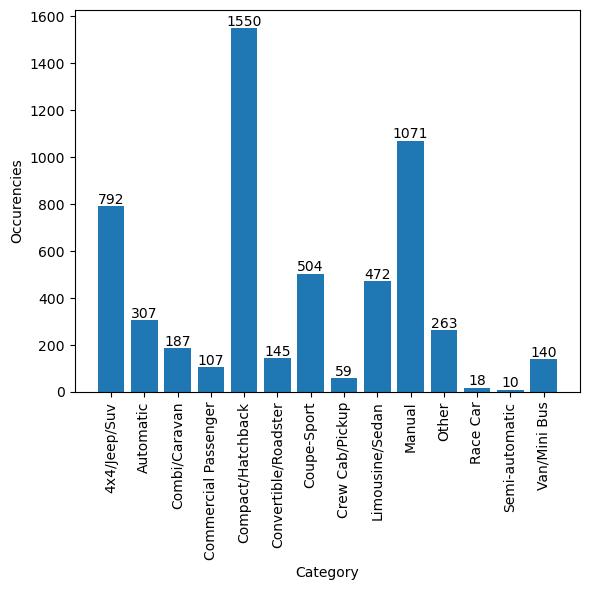

In [18]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby(['category']).size().index, df.groupby(['category']).size().values)
for i in range(len(df.groupby(['category']).size().index)):
    plt.text(i, df.groupby(['category']).size().values[i] + 10, df.groupby(['category']).size().values[i], ha = 'center')
plt.xlabel('Category')
plt.ylabel('Occurencies')
plt.xticks(rotation = 90)
plt.tight_layout();

In [19]:
with open('car_brands.pkl', 'rb') as file:
    car_brands = pickle.load(file)
with open('car_brand_models.pkl', 'rb') as file:
    car_brand_models = pickle.load(file)

In [20]:
for brand in list(car_brand_models.keys()):
    car_brand_models[brand.lower().capitalize()] = car_brand_models.pop(brand)

In [21]:
for brand in car_brands:
    if brand.lower() not in [x.lower() for x in car_brand_models.keys()]:
        car_brand_models[brand] = []

In [22]:
del car_brand_models['Geo']

In [23]:
brands = []
for title in df['title']:
    brand_found = False
    for brand in car_brand_models.keys(): 
        if brand.lower() in title.lower():
            brands.append(brand)
            brand_found = True
            break
    if not brand_found:
        brands.append('Unknown')
        
assert len(brands) == len(df['title'])

df['brand'] = brands

In [25]:
df.tail()

,title,price,registration,km,displacement,hp,fuel,transmission,category,location,link,brand
5620,Hyundai i 20 '18 1.1 DIESEL,11800,08/2017,101000,1100,75,Diesel,Manual,Compact/Hatchback,NaN,https://www.car.gr/classifieds/cars/view/33105...,Hyundai
5621,Renault Clio '17 ΑΥΤΟΜΑΤΟ EURO_6 ΟΘΟΝΗ 90HP ...,12890,03/2018,149800,1461,90,Diesel,Automatic,Other,NaN,https://www.car.gr/classifieds/cars/view/32747...,Renault
5622,Toyota Yaris '18 1.4 DIESEL,12900,08/2009,117000,1400,90,Diesel,Manual,Other,NaN,https://www.car.gr/classifieds/cars/view/33024...,Toyota
5623,Mercedes-Benz C 180 '09 Compressor BlueEFFI...,12300,02/2018,140000,1600,156,Petrol,Manual,4x4/Jeep/Suv,NaN,https://www.car.gr/classifieds/cars/view/33101...,Mercedes-benz
5624,Audi Q2 '18 1.6 TDI,20500,02/2018,113000,1600,115,Diesel,Manual,4x4/Jeep/Suv,NaN,https://www.car.gr/classifieds/cars/view/33167...,Audi


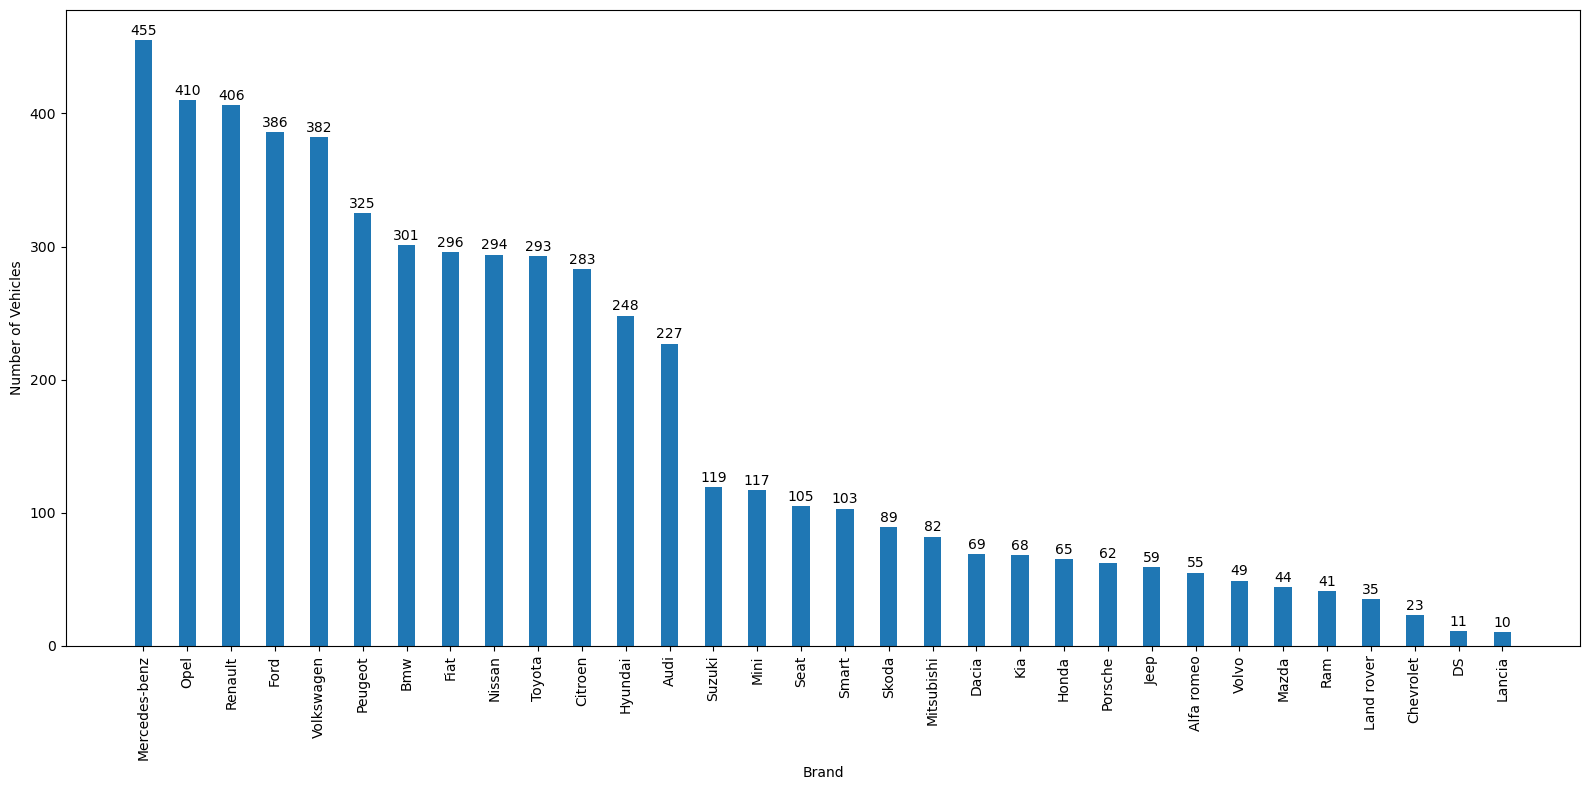

In [26]:
barplot = df.groupby(['brand']).size().sort_values(ascending = False)
barplot = barplot[barplot >= 10]

plt.figure(figsize=(16,8))
plt.bar(barplot.index, barplot.values, align='center', width=0.4)
for i in range(len(barplot.index)):
    plt.text(i, barplot.values[i] + 4, barplot.values[i], ha = 'center')
plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation = 90)
plt.tight_layout();

In [27]:
df.groupby(['location']).size().index

Index([' ABELAKIA 18902', ' ABELOKIPOI 56121', ' ABELOKIPOI 56123',
       ' AFLWNA 19011', ' AG. IWANNIS RENTIS 18233', ' AG. NIKOLAOS 72100',
       ' AGIA PARASKEFI 15341', ' AGIA PARASKEFI 15342',
       ' AGIA PARASKEFI 15343', ' AGIA VARVARA 12351',
       ...
       ' XANIA 73100', ' XANIA 73135', ' XIOS 82100', ' XOLARGOS 15561',
       ' XRYSOYPOLI 64200', ' YMITTOS 17237', ' ZAKYNTHOS 29100',
       ' ZWGRAFOS 15771', ' ZWGRAFOS 15772', '€'],
      dtype='object', name='location', length=502)

In [28]:
# As it seems listings with location marked with the Euro symbol '€' have been taken down so we drop them
euro_index = df[df['location'] == '€'].index
df.drop(euro_index, axis = 0, inplace = True)

In [36]:
towns = []
for x in df['location']:
    try:
        if len(x.split(' ')) == 3:
            town = x.split(' ')[1]
        elif len(x.split(' ')) == 4:
            town = ' '.join(x.split(' ')[1:3])
    except:
        # unfortunately because of a mistake i lost all the locations on listing_20&21 and i give them 'Unknown' value
        town = 'Unknown'
    towns.append(town)
    
df['town'] = towns

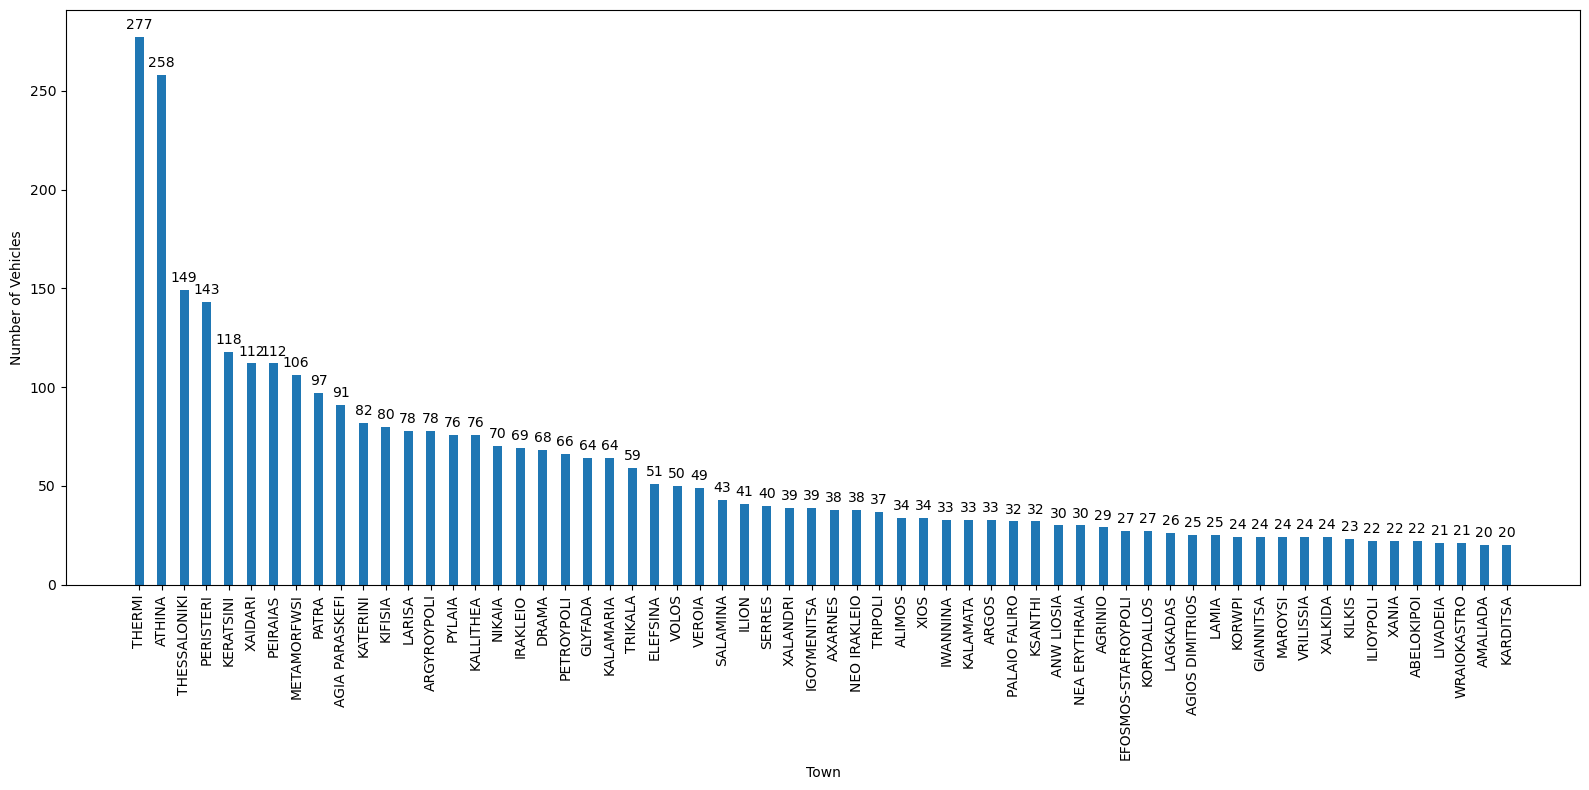

In [39]:
barplot = df.groupby(['town']).size().sort_values(ascending = False)[1:] # here i exclude 'Unknown' values
barplot = barplot[barplot >= 20]

plt.figure(figsize=(16,8))
plt.bar(barplot.index, barplot.values, align='center', width=0.4)
for i in range(len(barplot.index)):
    plt.text(i, barplot.values[i] + 4, barplot.values[i], ha = 'center')
plt.xlabel('Town')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation = 90)
plt.tight_layout();

In [40]:
car_brand_models.keys()

dict_keys(['Acura', 'Alfa romeo', 'Aston martin', 'Audi', 'Bentley', 'Bmw', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Daihatsu', 'Dodge', 'Eagle', 'Ferrari', 'Fiat', 'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Gmc', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land rover', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'Maserati', 'Maybach', 'Mazda', 'Mclaren', 'Mercedes-benz', 'Mercury', 'Mini', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Panoz', 'Plymouth', 'Polestar', 'Pontiac', 'Porsche', 'Ram', 'Rivian', 'Rolls-royce', 'Saab', 'Saturn', 'Scion', 'Smart', 'Srt', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Citroen', 'Opel', 'Peugeot', 'Renault', 'AC Cobra', 'Abarth', 'Aixam', 'Alpina', 'Ariel', 'Asia Motors', 'Austin Healey', 'Austin Morris', 'Austin Rover', 'Autobianchi', 'Beev', 'Brilliance', 'Bugatti', 'Casalini', 'Caterham', 'Chatenet', 'Chery', 'China-Motors', 'Club Car', 'Corvette', 'Cupra', 'DR', 'DS', 'Daci

In [41]:
car_brand_models['Renault'] += ['Clio', 'Megane', 'Captur', 'Kadjar', 'Arkana', 'Twingo', 'Twizy', 'Wind', 'Coupe',
                                'Espace', 'Fluence', 'Fuego', 'Kangoo', 'Koleos', 'Laguna', 'Modus', 'Scenic', 
                                'Talisman', 'Zoe']
car_brand_models['Citroen'] += ['2 CV', 'Berlingo', 'C1', 'C2', 'C3 Aircross', 'C3 Picasso', 'C3', 'C4 Aircross',
                                'C4 Picasso', 'C4 Cactus', 'C4 Grand Picasso', 'C4', 'C5 Aricross', 'C5 X', 'C5', 'C6',
                                'C-Elysee', 'DS4', 'DS5', 'DS-3', 'Jumper', 'Jumpy', 'Saxo', 'SpaceTourer', 'Xsara']
car_brand_models['Opel'] += ['Adam', 'Agila', 'Ascona', 'Astra', 'Corsa', 'Calibra', 'Cascada', 'Combo', 'Crossland',
                             'Grandland', 'GT', 'Insignia', "Kadett", 'Manta', 'Meriva', 'Mokka', 'Tigra', 'Vectra', 'Zafira']
car_brand_models['Peugeot'] += ['104', '106', '107', '108', '201', '204', '205', '206', '207', '208', '301', '304',
                                '305', '306', '307', '308', '309', '403', '404', '405', '406', '407', '504', '505', '508',
                                '604', '605', '607', '806', '807', '1007', '2008', '3008', '4007', '4008', '5008', ]
car_brand_models['Suzuki'] += ['Alto', 'Baleno', 'Cappuccino', 'Celerio', 'Crossover', 'Vitara', 'Ignis', 'Jimny',
                               'Samurai', 'Splash', 'Swace', 'Swift', 'SX4', 'Vitara', 'Wagon R']
car_brand_models['Smart'] = ['Crossblade', 'ForFour', 'ForTwo', 'Roadster']
car_brand_models['Seat'] += ['Altea', 'Arona', 'Arosa', 'Ateca', 'Cordoba', 'Ibiza', 'Leon', 'Mii', 'Tarraco', 'Toledo']
car_brand_models['Skoda'] += ['Octavia', 'Superb', 'Fabia', 'Kamiq', 'Kodiaq', 'Citigo', 'Enyaq', 'Karoq', 'Rapid',
                              'Scala', 'Scout', 'Yeti']
car_brand_models['Porsche'] += ['914', '997', '996']

In [42]:
car_brand_models['Alfa romeo'] += ['159', '156', 'Spider', 'Brera', 'GT', 'Tonale', 'Giulieta', 'Mito']
car_brand_models['Aston martin'] += ['DB7', 'DB9', 'Rapide', 'Vanquish']
car_brand_models['Audi'] += ['A1', 'Q2']

car_brand_models['Bmw'].remove('M')
car_brand_models['Bmw'] += ['Z3', 'i8', '114', '116', '118', '120', '125', '128', '130', '135',
                             '316', '318', '320', '323', '325', '328', '330', '335',
                             '214', '216', '218', '220', '223', '225', '228', '240', '230', '235',
                             '418', '420', '425', '428', '430', '435', '440', '518', '520', '523', '525', '528', '530',
                             '530', '535', '540', '545', '550']
car_brand_models['Fiat'] += ['500', '500L', '500S', 'Bravo', 'Panda', 'Cinquecento', 'Coupe', 'Doblo', 'Ducato', 'Multipla', 
                              'Punto', 'Seicento', 'Stilo', 'Tipo', 'Uno', '124']
car_brand_models['Ford'] += ['Fiesta', 'Focus', 'B-Max', 'C-Max', 'Crown', 'Escort', 'Fusion', 'Ka', 'Kuga', 'Mondeo',
                              'Puma', 'Ranger', 'Sierra', 'Transit']
car_brand_models['Honda'] += ['CR-Z', 'CRX', 'Integra', 'NSX', 'Prelude', 'Pilot', 'S2000']
car_brand_models['Hyundai'] += ['i10', 'i20', 'i30', 'Getz', 'Bayon', 'Coupe', 'Matrix']
car_brand_models['Kia'] += ['Ceed', 'Optima', 'Picanto', 'Pride', 'ProCeed', 'Rio', 'Stinger', 'Stonic', 'XCeed']
car_brand_models['Lamborghini'] += ['Gallardo', 'Murcielago', 'Diablo']
car_brand_models['Land rover'] += ['Freelander']
car_brand_models['Lotus'] += ['Elan', 'Elise', 'Emira', 'Esprit', "Europa", 'Evora', 'Exige']
car_brand_models['Mazda'] += ['2', '3', '6', '323', 'CX-7', 'RX-6', 'RX-7', 'RX-8', 'MX-5', 'Tribute', 'Xedos']
car_brand_models['Mercedes-benz'] += ['CLC', 'CLK', 'SLK', 'EQA', 'EQB', 'EQC', 'EQS', 'GL', 'GLK', 'Citan' 
                                      'Maybach', 'ML', 'SLS', 'Vito', 'A 140', 'A 160', 'A 180', 'A 200', 'A 250', 
                                      'A 150', 'A 170', 'A 190', 'A 220', 'B 150', 'B 160', 'B 170', 'B 180', 'B 200',
                                      'B 220', 'B 250', 'C 160', 'C 180', 'C 200', 'C 220', 'C 230', 'C 240', 'C 250',
                                      'C 270', 'C 280', 'C 300', 'C 320', 'C 350', 'C 400', 'E 180', 'E 200', 'E 220',
                                      'E 230', 'E 240', 'E 250', 'E 260', 'E 270', 'E 280', 'E 290', 'E 300', 'E 320',
                                      'E 350', 'E 400', 'E 420', 'E 430', 'E 450', 'E 500', 'S 280']
car_brand_models['Mini'] += ['One', 'Cooper', 'Paceman']
car_brand_models['Mitsubishi'] += ['ASX', '3000 GT', 'Colt', 'Eclipse', 'L200', 'L300', 'L400', 'Lancer', 'Mirage', 
                                    'Outlander', 'Pajero', 'Space Star']
car_brand_models['Nissan'] += ['200SX', '240SX', '350Z', '370Z', 'Almera', 'Cargo', 'Cube', 'Datsun', 'Frontier', 'Juke', 
                                'Micra', 'Navara', 'NP300', 'NV 200', 'Patrol', 'Primera', 'Pulsar', 'Qashqai', 'Serena', 
                                'Sylvia', 'SKyline', 'Terrano', 'Sunny', 'Tida', 'X-Trail']
car_brand_models['Subaru'] += ['Baja', 'Justy', 'Levorg', 'Trezia', 'Tribeca', 'XT', 'XV']
car_brand_models['Toyota'] += ['Auris', 'Avensis', 'Aygo', 'Carina', 'Celica', 'GT86', 'Hilux', 'iQ', 
                                'Land Cruiser', 'Matrix', 'Mirai', 'MR 2', 'Proace', 'Surpa', 'Tacoma', 'Tundra',
                                'Urban Cruiser', 'Verso', 'Yaris Cross', 'Yaris']
car_brand_models['Volkswagen'].remove('CC')
car_brand_models['Volkswagen'].remove('GTI')
car_brand_models['Volkswagen'] += ['Amarok', 'Beetle', 'Buggy', 'Caddy', 'Corrado', 'Eos', 'Golf', 'ID.3', 'ID.5', 'Phaeton', 
                                   'Polo', 'Scirocco', 'T-Cross', 'T-Roc', 'Taigo', 'Touareg', 'Touran', 'Up']
car_brand_models['Volvo'] += ['V40', 'S40', 'XC90']

In [43]:
df['model'] = None

In [44]:
for brand in df['brand'].unique():
    dummy = df[df['brand'] == brand]
    brand_models = []
    brand_index = df[df['brand'] == brand].index
    for title in dummy['title']:
        model_found = False
        if brand in car_brand_models.keys(): # Not all brands on df are in the dictionary with the models
            for model in car_brand_models[brand]: 
                if model.lower() in title.lower():
                    brand_models.append(model)
                    model_found = True
                    break
        if not model_found:
            brand_models.append('Unknown')
    try:
        df.loc[brand_index, ['model']] = np.array(brand_models).reshape(-1, 1)
    except:
        shape = df.loc[brand_index, ['model']].shape
        print(f'{brand} shape mismatch {np.array(brand_models).reshape(-1, 1).shape} to {shape}')

In [45]:
df.groupby(['model']).size().sort_values(ascending = False)

model
Unknown      747
Corsa        167
Clio         163
Fiesta       159
Polo         132
            ... 
E 320          1
Cruze          1
Crossfire      1
Clubman        1
Espace         1
Length: 357, dtype: int64

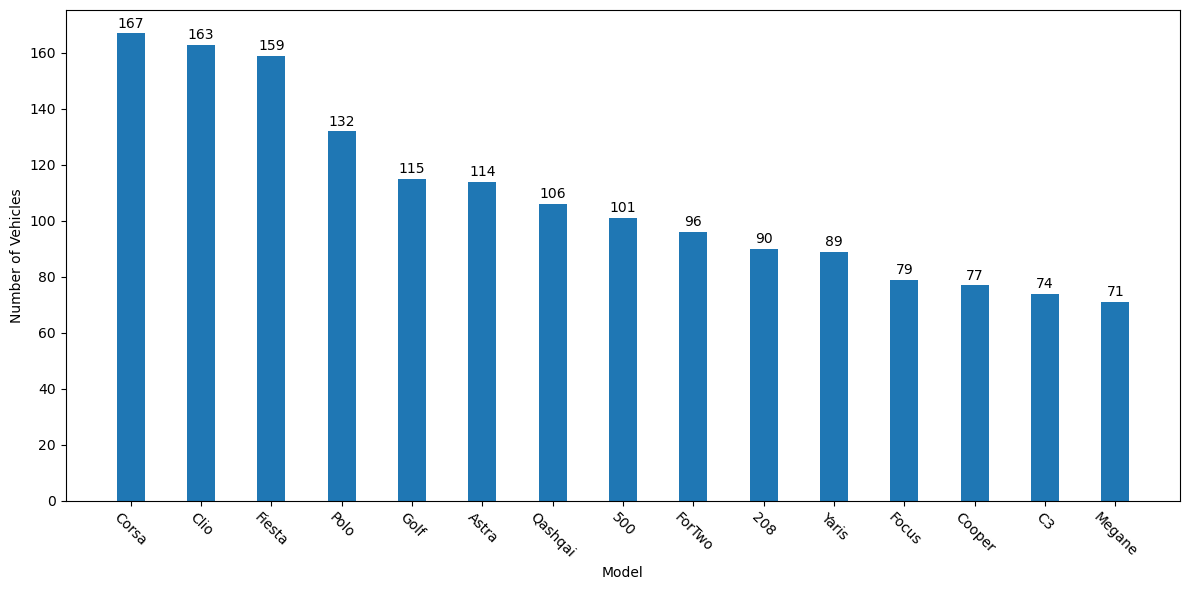

In [46]:
barplot = df.groupby(['model']).size().sort_values(ascending = False)
barplot = barplot[1:16]

plt.figure(figsize=(12,6))
plt.bar(barplot.index, barplot.values, align='center', width=0.4)
for i in range(len(barplot.index)):
    plt.text(i, barplot.values[i] + 2, barplot.values[i], ha = 'center')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation = -45)
plt.tight_layout();

In [47]:
df.to_csv('data_new.csv')